# Netflix Dataset
## Top Actors/Actresses, Directors, Genres, and Countries

Dataset Available Here : https://www.kaggle.com/shivamb/netflix-shows

### Importing Libraries

In [120]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.preprocessing import scale, MinMaxScaler

### Loading Dataset

In [131]:
netflix = pd.read_csv('./netflix_titles.csv')
print(netflix.info())
netflix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Some Preprocessing

In [132]:
netflix.dropna(subset=['date_added'], inplace=True)
netflix['director'].fillna('missing', inplace=True)
netflix['cast'].fillna('missing', inplace=True)
netflix['country'].fillna('missing', inplace=True)
netflix['rating'].fillna('missing', inplace=True)

netflix.set_index(netflix['show_id'], inplace=True)
netflix.drop('show_id', axis=1, inplace=True)

print(netflix.info())
netflix

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7777 non-null   object
 1   title         7777 non-null   object
 2   director      7777 non-null   object
 3   cast          7777 non-null   object
 4   country       7777 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.1+ KB
None


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s7785,Movie,Zulu Man in Japan,missing,Nasty C,missing,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


### Functions : 
#### a. get_count_elements(data : pandas.DataFrame, element_name : string/column name) : returns pandas.Series of elements and it's count
#### b. get_popular_data(data : pandas.DataFrame, element_name : string/column name) : returns sorted pandas.Series of elements and it's count
#### c. display_top_n(n : int, data : pandas.Series) : returns pandas.Series with top indices with top n values.
#### d. set_prob(data : pandas.Series) : returns pandas.Series with probabilities assigned to each element

In [133]:
def get_count_elements(data, element_name):
    
    sp_char = [',', '&']

    series_element_count = data.groupby(element_name)[element_name].count()

    for i in range(series_element_count.size):
        row_1 = series_element_count.index[i].split(', ')

        for k in sp_char:
            row_1 = pd.Series(row_1).apply(lambda x: x.replace(k, ''))

        if len(row_1) >1:
            for j in row_1:
                if j in series_element_count.index:
                    series_element_count.loc[j] += 1

                elif j not in series_element_count.index:
                    series_element_count.loc[j] = 1

            series_element_count[series_element_count.index[i]] = None

        else:
            continue
            
    series_element_count.dropna(inplace=True)
        
    return series_element_count

In [134]:
def get_popular_data(data, element_name):
    
    popular_data = get_count_elements(data, element_name)
    popular_data.sort_values(ascending=False, inplace=True)
    
    return popular_data

In [135]:
def set_prob(data):
    sum_ = data.sum()    
    prob = data.apply(lambda x: x/sum_)
    
    return prob

In [136]:
def display_top_n(n, data):
    return data[:n]

In [144]:
def plot_distribution(n, data, heading, skip=None):
    
    fig = plt.figure(figsize=(10, 5))
    plt.title(heading)
    plt.xticks(rotation=45)
    sns.barplot(x=data.index[:n], y=data.values[skip:n])
    plt.show()

### Getting Top 10 Country

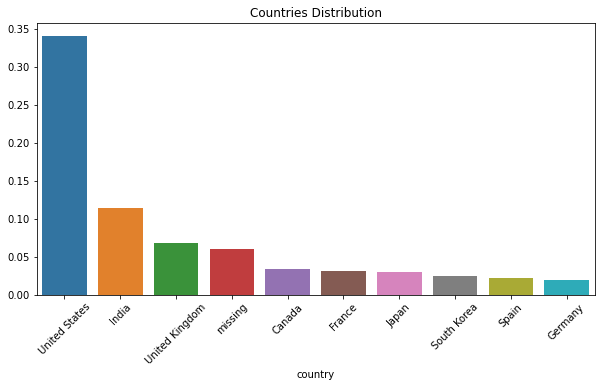

In [140]:
countries = get_popular_data(netflix, 'country')
top_countries = display_top_n(10, countries)
prob_countries = set_prob(countries)

plot_distribution(10, prob_countries, 'Countries Distribution')

### Getting Top 10 Genres

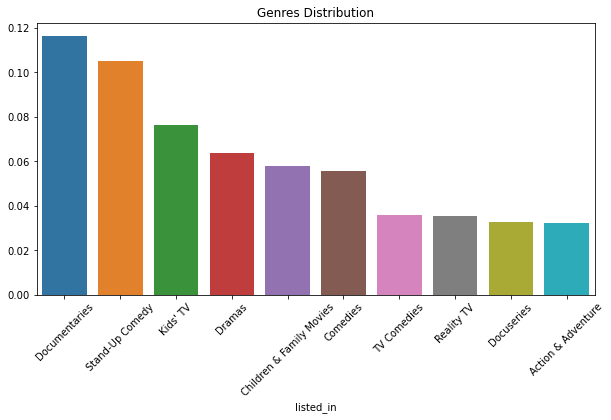

In [141]:
genres = get_popular_data(netflix, 'listed_in')
# top_genres = display_top_n(10, genres)
prob_genres = set_prob(genres)

plot_distribution(10, prob_genres, 'Genres Distribution')

### Getting Top 10 Directors

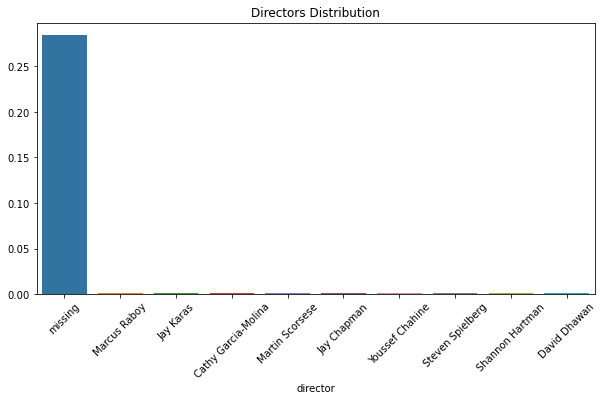

In [142]:
directors = get_popular_data(netflix, 'director')
# top_directors = display_top_n(10, directors)
prob_directors = set_prob(directors)

plot_distribution(10, prob_directors, 'Directors Distribution', skip=0)

### Getting Top 10 Casts/ Actors/Actresses

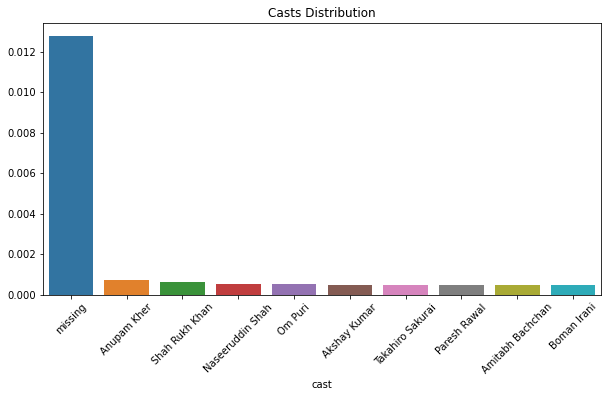

In [143]:
casts = get_popular_data(netflix, 'cast')
# top_casts = display_top_n(10, casts)
prob_casts = set_prob(casts)

plot_distribution(10, prob_casts, 'Casts Distribution')